In [ ]:
import torch
import os
import torch.nn as nn
from model import UNet3d

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # Set the GPUs 2 and 3 to use

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print('Device:', device)
print('Current cuda device:', torch.cuda.current_device())
print('Count of using GPUs:', torch.cuda.device_count())
img = torch.randn(1, 3, 52, 120, 120).to(device)
model = UNet3d(in_channels=3, n_classes=3,
                n_channels=24).to(device)
out = model(img)

In [ ]:
out.shape

In [ ]:
tdata = torch.randn(1, 3, 50, 256, 256)
unet_output = unet_model(tdata)

In [ ]:
from torchsummary import summary

summary(unet_model, (3,50, 256, 256))

In [ ]:
from utils import get_dataloader
from dataset import BratsDataset

test_dataloader = get_dataloader(dataset=BratsDataset, phase="train", resize_info=[0,155,3], img_width=120, data_type=['-t1c.nii.gz'], batch_size=1)

In [ ]:
tb = next(iter(test_dataloader))
tb

In [ ]:
import torch
from model import UNet3d
import torch.nn as nn
model_name = 'aug_test'
save_path = f'models/{model_name}'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = UNet3d(in_channels=4, n_classes=3,
                n_channels=32).to(device)
model = nn.DataParallel(model).to(device)
model.load_state_dict(torch.load(f'{save_path}/best-{model_name}.pth'))
torch.save(model, f'{save_path}/{model_name}.pth')

In [1]:
import matplotlib.pyplot as plt
def plot_all_slides(img):
    img_slides = img[0]
    plt.figure(figsize=(20,20))
    for i, _img in enumerate(img_slides[20:120]):
        plt.subplot(10,10,i+1)
        plt.imshow(_img, cmap='gray')
        plt.axis('off')
    plt.show()

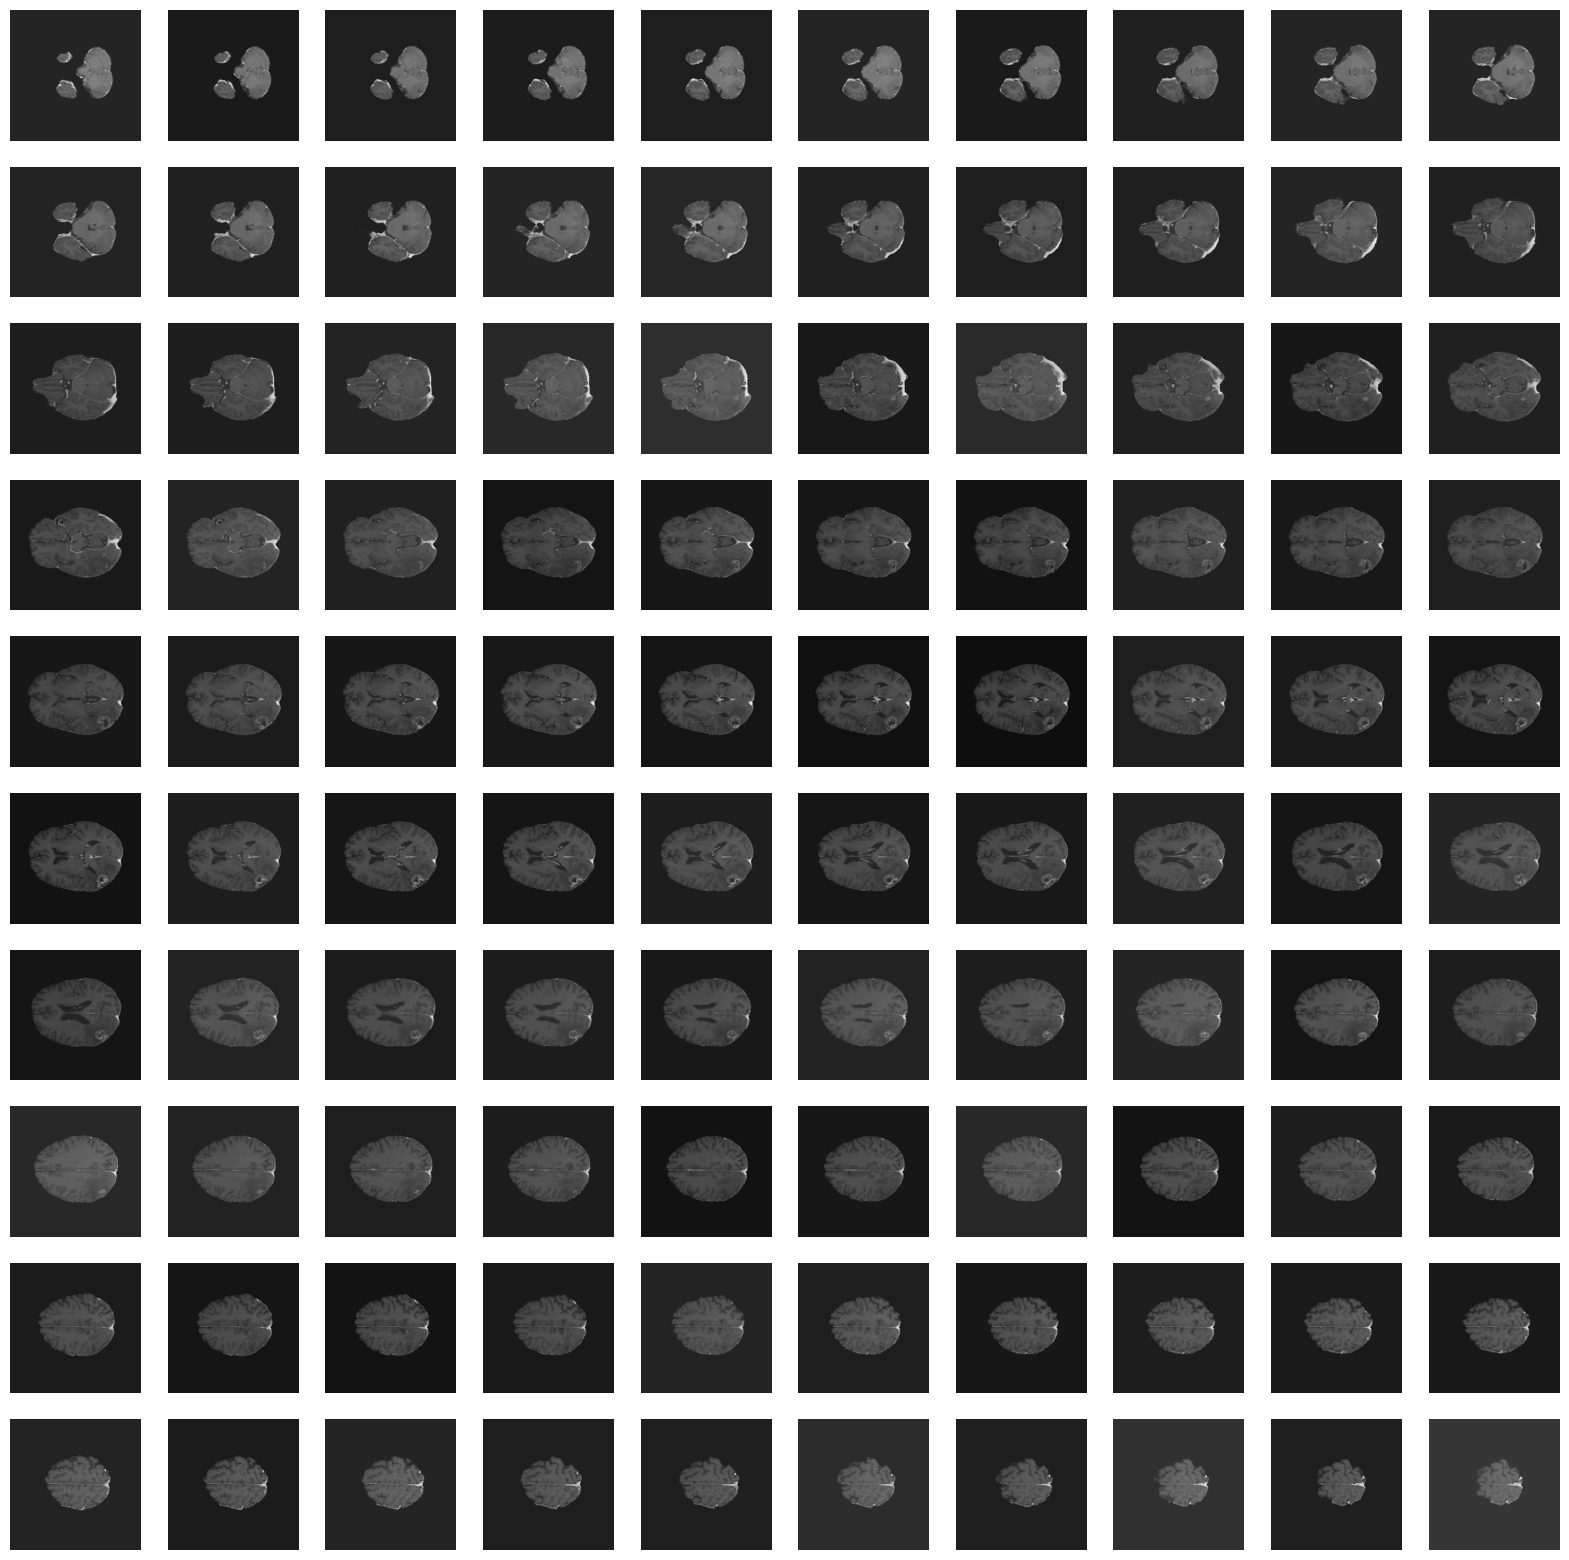

In [2]:
from utils import get_dataloader
from dataset import BratsDataset

test_dataloader = get_dataloader(dataset=BratsDataset, phase="train", img_depth=155, img_width=240, data_type=['-t1c.nii.gz'], batch_size=1)
tb = next(iter(test_dataloader))
img = tb['image']
plot_all_slides(img[0])
# plot_all_slides(img[1])
# plot_all_slides(img[2])
# plot_all_slides(img[3])

In [3]:
import nibabel as nib
import numpy as np
id_ = tb['Id'][0]
data = nib.load(f'brats_data/train/{id_}/{id_}-t1c.nii.gz')
data = np.asarray(data.dataobj)
data = data.transpose(2,0,1)
data.shape

(155, 240, 240)

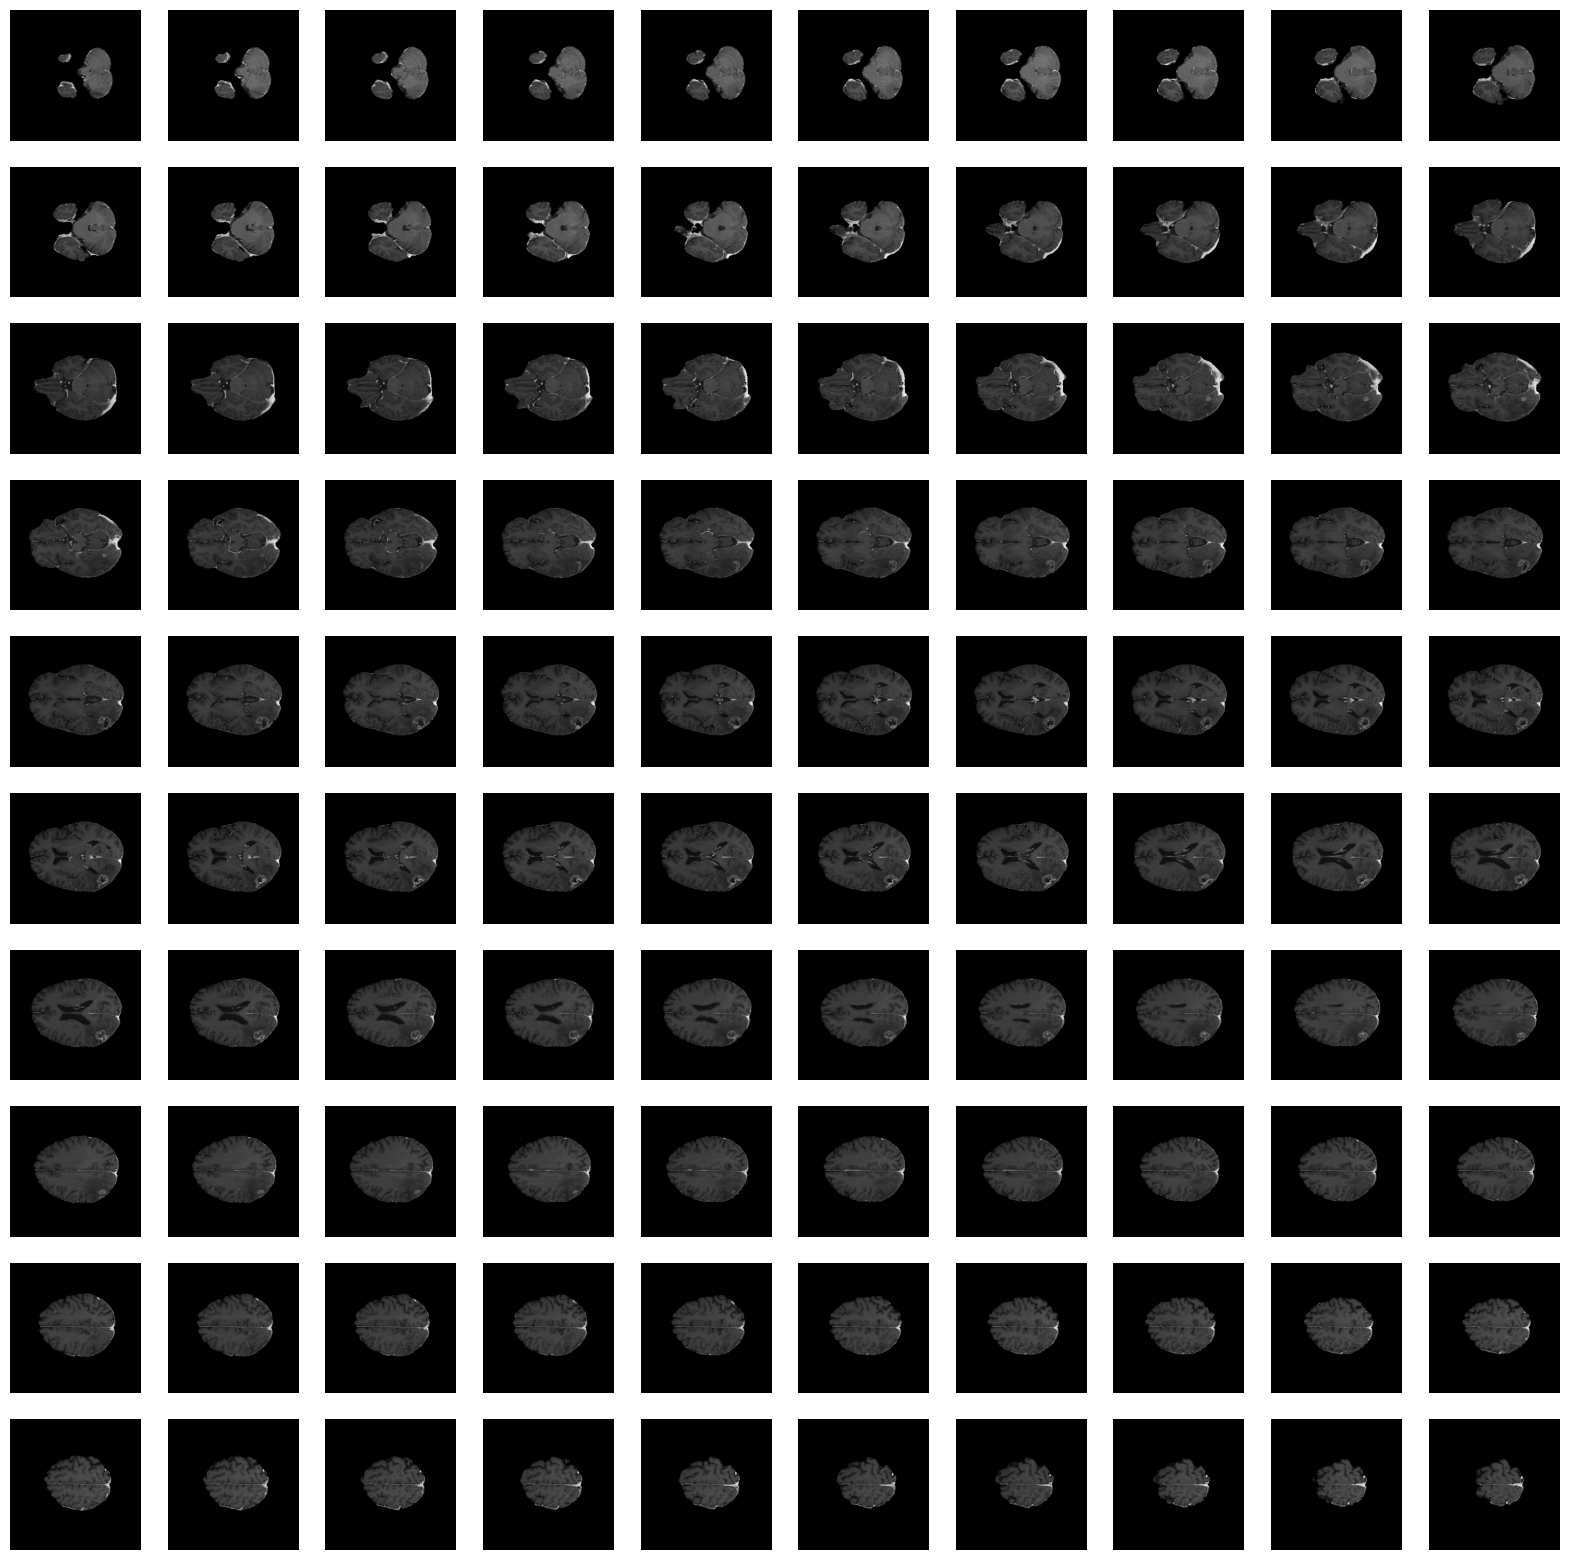

In [4]:
plt.figure(figsize=(20,20))
for i, img in enumerate(data[20:120]):
    plt.subplot(10,10, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

In [2]:
import numpy as np
img_np = img.detach().cpu().numpy()
np.unique(img_np, return_counts=True)
# t_img_np = img_np.transpose(0,4,3,1,2)
# plot_all_slides(t_img_np[0])
# plot_all_slides(t_img_np[1])
# plot_all_slides(t_img_np[2])
# plot_all_slides(t_img_np[3])

(array([-0.42873173, -0.37731135, -0.37426379, ...,  1.10254257,
         1.11639547,  1.13274253]),
 array([1, 1, 1, ..., 1, 1, 1]))